## Coordinate transform example

In [12]:
from pathlib import Path

import river.core.coordinate_transform as ct

In [13]:
x1_pix, y1_pix = 1700, 1345
x2_pix, y2_pix = 2474, 841
x1_rw, y1_rw = 25, 0
x2_rw, y2_rw = 0, 0

In [14]:
pixel_size = ct.get_pixel_size(x1_pix, y1_pix, x2_pix, y2_pix, x1_rw, y1_rw, x2_rw, y2_rw)

In [15]:
matrix = ct.get_uav_transformation_matrix(pixel_size, x1_pix, y1_pix, x2_pix, y2_pix, x1_rw, y1_rw, x2_rw, y2_rw)

In [16]:
rw_coordinates = ct.transform_pixel_to_real_world(x1_pix, y2_pix, matrix)

In [18]:
rw_coordinates

array([841.,  25.])

In [17]:
pix_coordinate = ct.transform_real_world_to_pixel(x1_rw, y1_rw, matrix)

LinAlgError: Singular matrix

In [19]:
pixel_size, x1_pix, y1_pix, x2_pix, y2_pix, x1_rw, y1_rw, x2_rw, y2_rw

(np.float64(0.027067121599078994), 1700, 1345, 2474, 841, 25, 0, 0, 0)

## Version Nueva

In [21]:
with open('/home/nstefani/Downloads/DJI_0036123123_123123/settings.json', 'r') as file:
    settings = json.load(file)

In [22]:
path_x_sections = Path(settings['xsections'])
path_results_piv = Path(settings['piv_results'])
step = settings['video_range']['step']
path_transformation_matrix = Path(settings['pixel_size']['uav_transformation_matrix'])
fps = settings['fps']
id_section = 0

In [13]:
xsections = json.loads(path_x_sections.read_text())
piv_results = json.loads(path_results_piv.read_text())
transformation_matrix = json.loads(path_transformation_matrix.read_text())

xsections = cs.update_current_x_section(xsections, piv_results, transformation_matrix, step, fps, id_section, interpolate = True)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

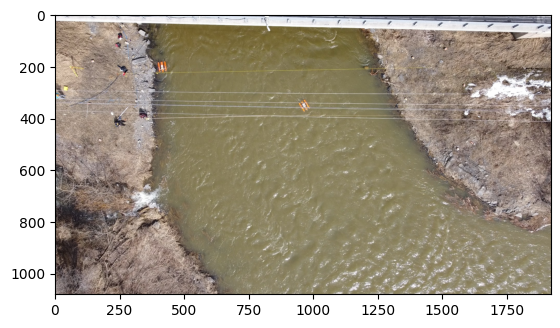

In [14]:
from matplotlib import pyplot as plt
image = plt.imread('/home/nstefani/Downloads/0000000003.jpg')
plt.imshow(image)
plt.quiver(xsections['CS_default_1']['x'],xsections['CS_default_1']['y'],xsections['CS_default_1']['displacement_x_streamwise'],xsections['CS_default_1']['displacement_y_streamwise'],color='red')

plt.plot(table_results['x'],table_results['y'])
plt.quiver(table_results['x'],table_results['y'],table_results['displacement_x_streamwise'],table_results['displacement_y_streamwise'])
